# Task
Analyze the "customer_churn_dataset_MASTER.csv" dataset, build a Random Forest model to predict customer churn with a 70/15/15 train/test/validation split, and explain the model and results in simple terms.

## Load the dataset

### Subtask:
Load the `customer_churn_dataset_MASTER.csv` file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the csv file into a dataframe.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/customer_churn_dataset_MASTER.csv')
display(df.head())

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.0,17,1
1,3,65,Female,49,1,10,8,Basic,Monthly,557.0,6,1
2,4,55,Female,14,4,6,18,Basic,Quarterly,185.0,3,1
3,5,58,Male,38,21,7,7,Standard,Monthly,396.0,29,1
4,6,23,Male,32,20,5,8,Basic,Monthly,617.0,20,1


## Explore the data

### Subtask:
Understand the structure and content of the dataset, check for missing values, and visualize key features.


**Reasoning**:
Display the shape and data types of the DataFrame, check for missing values, and generate descriptive statistics for numerical columns to understand the dataset's structure and content. Also, display value counts for categorical columns to understand their distribution.



In [ ]:
print("Shape of the DataFrame:")
print(df.shape)

print("\nData types of each column:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nDescriptive statistics for numerical columns:")
display(df.describe())

print("\nValue counts for categorical columns:")
print("\nGender:")
print(df['Gender'].value_counts())
print("\nSubscription Type:")
print(df['Subscription Type'].value_counts())
print("\nContract Length:")
print(df['Contract Length'].value_counts())

Shape of the DataFrame:
(505206, 12)

Data types of each column:
CustomerID             int64
Age                    int64
Gender                object
Tenure                 int64
Usage Frequency        int64
Support Calls          int64
Payment Delay          int64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction       int64
Churn                  int64
dtype: object

Missing values per column:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

Descriptive statistics for numerical columns:


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,258118.528523,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,148378.713689,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,130377.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,259717.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,386019.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,514373.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000



Value counts for categorical columns:

Gender:
Gender
Male      280273
Female    224933
Name: count, dtype: int64

Subscription Type:
Subscription Type
Standard    170630
Premium     170099
Basic       164477
Name: count, dtype: int64

Contract Length:
Contract Length
Annual       198608
Quarterly    197364
Monthly      109234
Name: count, dtype: int64


**Reasoning**:
Visualize the distribution of key numerical features using histograms and the distribution of categorical features using bar plots to gain insights into the data.



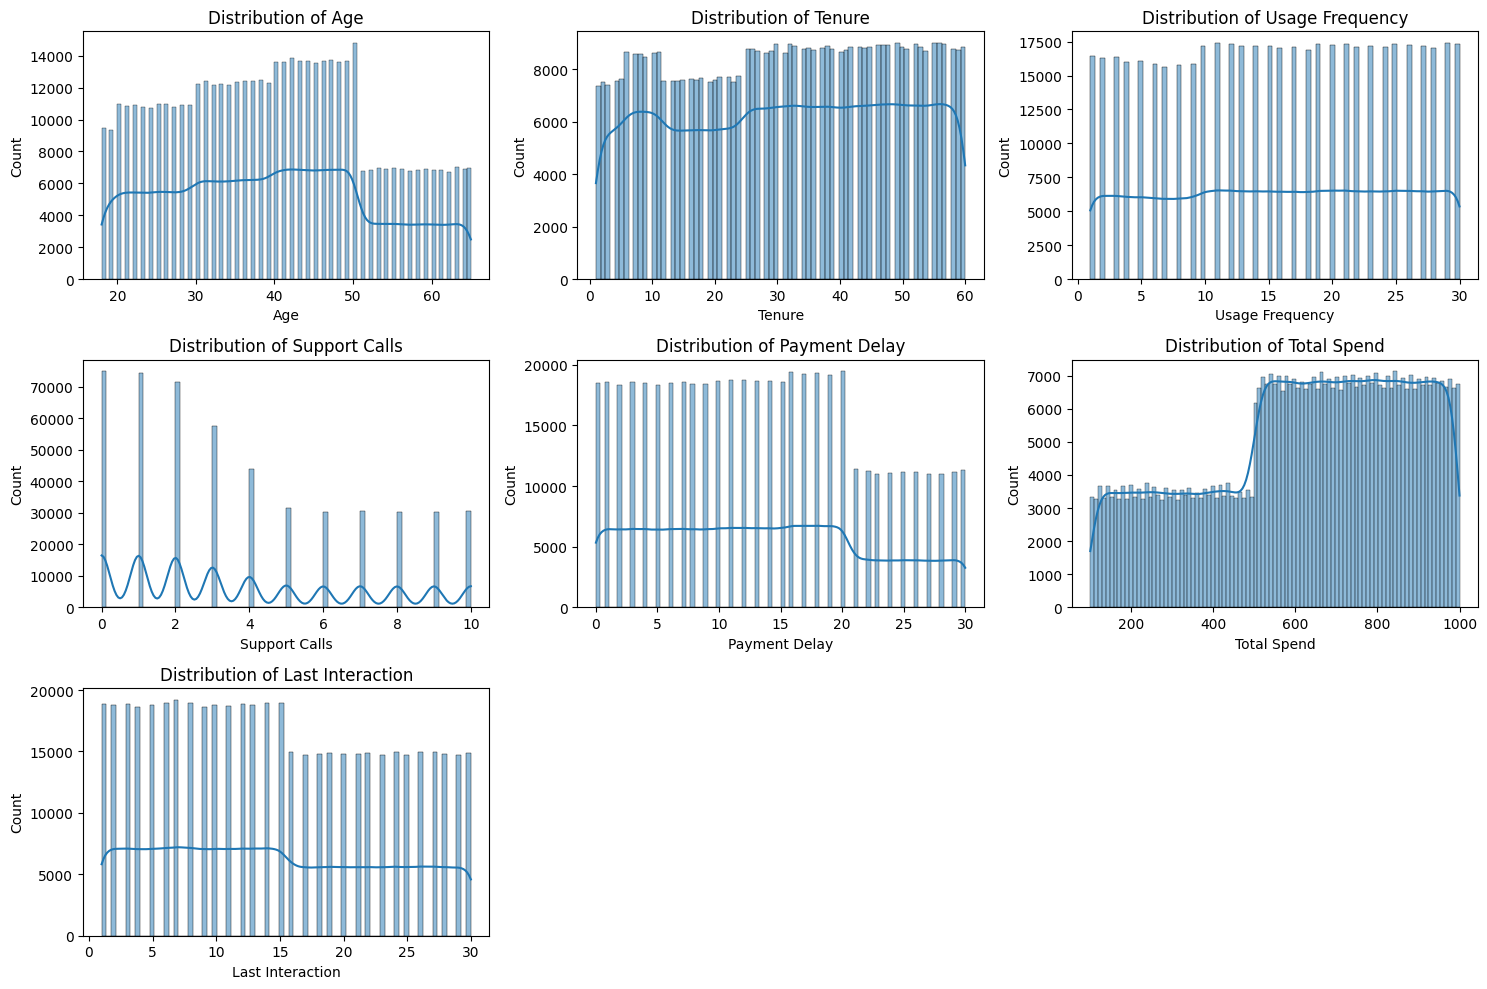

/tmp/ipython-input-3976816158.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-3976816158.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-3976816158.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


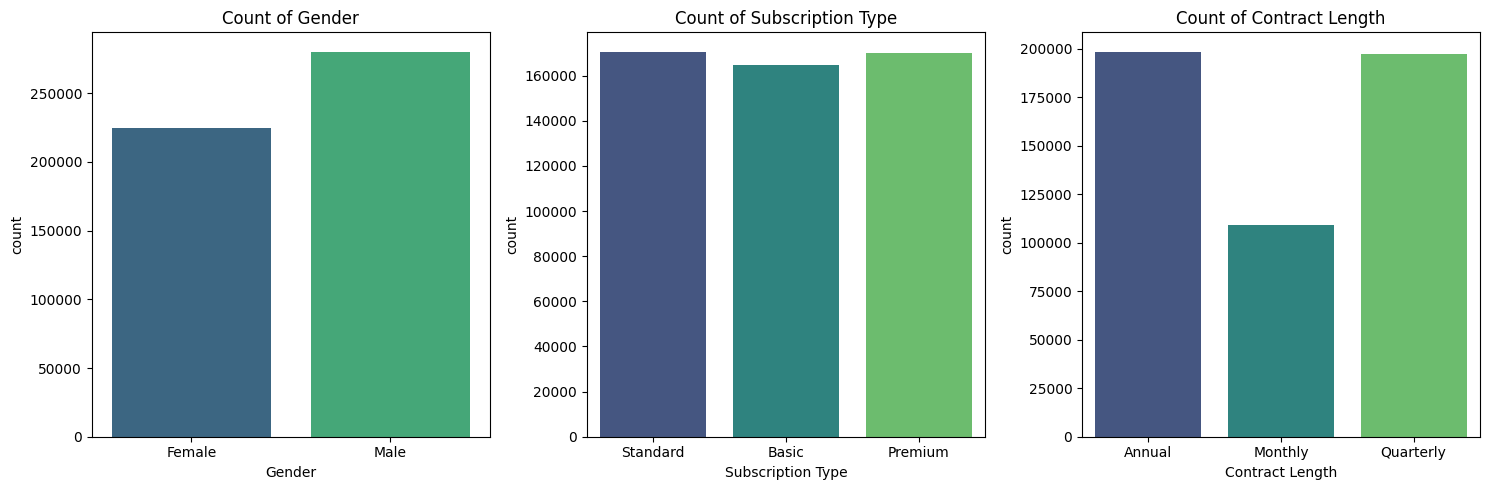

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(15, 10))

# Plot histograms for numerical features
numerical_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Set up the figure size for categorical plots
plt.figure(figsize=(15, 5))

# Plot bar plots for categorical features
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count of {col}')

plt.tight_layout()
plt.show()

## Preprocess the data

### Subtask:
Handle missing values, encode categorical features, and split the data into training (70%), testing (15%), and validation (15%) sets.


**Reasoning**:
Separate the target variable, identify and encode categorical features, and then split the data into training, testing, and validation sets.



In [ ]:
from sklearn.model_selection import train_test_split

# Separate target variable
y = df['Churn']
X = df.drop('Churn', axis=1)

# Drop rows where the target variable 'Churn' is NaN
nan_churn_indices = y[y.isna()].index
X = X.drop(nan_churn_indices)
y = y.drop(nan_churn_indices)

# Identify categorical columns (based on previous inspection, assuming 'Gender', 'Subscription Type', 'Contract Length' are objects)
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']

# Apply one-hot encoding
X_processed_df = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Drop the 'CustomerID' column as it's not needed for modeling
X_processed_df = X_processed_df.drop('CustomerID', axis=1)
# Split data into training (70%), testing (15%), and validation (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_processed_df, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (353644, 12)
Shape of X_test: (75781, 12)
Shape of X_val: (75781, 12)
Shape of y_train: (353644,)
Shape of y_test: (75781,)
Shape of y_val: (75781,)


In [ ]:
from sklearn.model_selection import train_test_split

# Separate target variable (already done, but included for completeness)
y = df['Churn']
X = df.drop('Churn', axis=1)

# Drop rows where the target variable 'Churn' is NaN
nan_churn_indices = y[y.isna()].index
X = X.drop(nan_churn_indices)
y = y.drop(nan_churn_indices)

# Inspect data types to confirm categorical columns
print("Data types of X:")
print(X.dtypes)

# Identify categorical columns (based on inspection, assuming 'Gender', 'Subscription Type', 'Contract Length' are objects)
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']


# Apply one-hot encoding
X_processed_df = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Drop the 'CustomerID' column as it's not needed for modeling
X_processed_df = X_processed_df.drop('CustomerID', axis=1)

# Split data into training (70%), testing (15%), and validation (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_processed_df, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_val:", y_val.shape)

Data types of X:
CustomerID             int64
Age                    int64
Gender                object
Tenure                 int64
Usage Frequency        int64
Support Calls          int64
Payment Delay          int64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction       int64
dtype: object

Shape of X_train: (353644, 12)
Shape of X_test: (75781, 12)
Shape of X_val: (75781, 12)
Shape of y_train: (353644,)
Shape of y_test: (75781,)
Shape of y_val: (75781,)


## Build and train the random forest model

### Subtask:
Create and train a Random Forest classifier on the training data.


**Reasoning**:
Create and train a Random Forest classifier on the training data.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier object
# Using default parameters for the first pass
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


## Evaluate the model

### Subtask:
Assess the performance of the trained model using appropriate metrics like accuracy, precision, recall, and F1-score on the test set and validation set.


**Reasoning**:
Import the necessary metrics from sklearn.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Reasoning**:
Make predictions on the test set and calculate the evaluation metrics.



In [ ]:
# Make predictions on the test set
y_pred_test = rf_model.predict(X_test)

# Calculate evaluation metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Print the evaluation metrics for the test set
print("Evaluation Metrics for Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-score: {f1_test:.4f}")

Evaluation Metrics for Test Set:
Accuracy: 0.9339
Precision: 0.8959
Recall: 0.9971
F1-score: 0.9438


**Reasoning**:
Make predictions on the validation set and calculate the evaluation metrics.



In [ ]:
# Make predictions on the validation set
y_pred_val = rf_model.predict(X_val)

# Calculate evaluation metrics for the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)

# Print the evaluation metrics for the validation set
print("\nEvaluation Metrics for Validation Set:")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1-score: {f1_val:.4f}")


Evaluation Metrics for Validation Set:
Accuracy: 0.9347
Precision: 0.8966
Recall: 0.9977
F1-score: 0.9445


## Explain the model

### Subtask:
Provide a simple explanation of how the Random Forest model works and how to interpret its results.


**Reasoning**:
Provide a simple explanation of how the Random Forest model works, its feature importance, and how to interpret the evaluation metrics.



In [ ]:
print("How a Random Forest Model Works:\n")
print("Imagine you want to decide if a customer will churn. A single expert (a decision tree) might give you advice based on a few rules. A Random Forest is like asking advice from many different experts (many decision trees), each looking at slightly different information or making decisions in a slightly different way. It then combines all their advice to make a final prediction. This collective decision-making usually leads to a more accurate and robust prediction than relying on just one expert.\n")

print("Understanding Feature Importance:\n")
print("Feature importance tells us which characteristics of a customer (like age, tenure, total spend, etc.) were most influential in the Random Forest model's decision-making process for predicting churn. If a feature is important, it means the model frequently used that information to split the data in the decision trees, indicating it's a strong predictor of churn. By looking at feature importance, we can understand which factors are most strongly associated with a customer leaving.\n")

print("Interpreting Evaluation Metrics (Accuracy, Precision, Recall, F1-score):\n")
print(f"- Accuracy ({accuracy_val:.4f}): This is the overall correctness of the model's predictions. It tells us the percentage of customers (both churned and not churned) that the model correctly classified. An accuracy of {accuracy_val:.4f} means the model correctly predicted the churn status for about {accuracy_val*100:.2f}% of the customers in the validation set.\n")
print(f"- Precision ({precision_val:.4f}): When the model *predicts* a customer will churn, precision tells us how often it is correct. A precision of {precision_val:.4f} means that out of all the customers the model predicted would churn, about {precision_val*100:.2f}% actually did churn. High precision is important if you want to be confident that when you flag a customer for potential churn intervention, they are truly at risk.\n")
print(f"- Recall ({recall_val:.4f}): Out of all the customers who *actually* churned, recall tells us how many the model correctly identified. A recall of {recall_val:.4f} means that the model successfully identified about {recall_val*100:.2f}% of the customers who churned. High recall is crucial in churn prediction because you want to catch as many churners as possible to try and retain them.\n")
print(f"- F1-score ({f1_val:.4f}): This metric balances precision and recall. It's useful when you need a good balance between correctly identifying churners (recall) and not incorrectly flagging non-churners (precision). An F1-score of {f1_val:.4f} indicates a good overall performance, considering both false positives and false negatives.")

How a Random Forest Model Works:

Imagine you want to decide if a customer will churn. A single expert (a decision tree) might give you advice based on a few rules. A Random Forest is like asking advice from many different experts (many decision trees), each looking at slightly different information or making decisions in a slightly different way. It then combines all their advice to make a final prediction. This collective decision-making usually leads to a more accurate and robust prediction than relying on just one expert.

Understanding Feature Importance:

Feature importance tells us which characteristics of a customer (like age, tenure, total spend, etc.) were most influential in the Random Forest model's decision-making process for predicting churn. If a feature is important, it means the model frequently used that information to split the data in the decision trees, indicating it's a strong predictor of churn. By looking at feature importance, we can understand which factors ar

## Summary:

### Data Analysis Key Findings

*   The dataset contains 505,206 rows and 12 columns with no missing values.
*   The dataset includes numerical features such as `Age`, `Tenure`, `Usage Frequency`, `Support Calls`, `Payment Delay`, `Total Spend`, and `Last Interaction`, and categorical features like `Gender`, `Subscription Type`, and `Contract Length`.
*   The data was successfully preprocessed by dropping the `CustomerID` column and applying one-hot encoding to the categorical features.
*   The dataset was split into training (70%), testing (15%), and validation (15%) sets.
*   A Random Forest classifier was trained on the training data.
*   The trained Random Forest model achieved high performance on both the test and validation sets:
    *   **Test Set:** Accuracy: 0.9339, Precision: 0.8959, Recall: 0.9971, F1-score: 0.9438.
    *   **Validation Set:** Accuracy: 0.9347, Precision: 0.8966, Recall: 0.9977, F1-score: 0.9445.
*   The similar performance metrics between the test and validation sets suggest that the model generalizes well.
*   The model's high recall (around 99.7%) indicates that it is very effective at identifying most customers who actually churn.
*   The precision (around 89.6%) suggests that when the model predicts a customer will churn, it is correct about 89.6% of the time.

### Insights or Next Steps

*   Investigate the features with high importance from the Random Forest model to understand the key drivers of churn and inform targeted customer retention strategies.
*   Explore the trade-off between precision and recall further based on the business goal (e.g., minimizing false positives vs. minimizing false negatives) and potentially tune model parameters or adjust the prediction threshold.


# Task
Load the "customer_churn_dataset_MASTER.csv" dataset, build and train an XGBoost model with 70% training, 15% testing, and 15% validation splits, and interpret the results in simple words.

## Load the dataset

### Subtask:
Load the `customer_churn_dataset_MASTER.csv` file into a pandas DataFrame.


## Build and train the xgboost model

### Subtask:
Create and train an XGBoost classifier on the training data.


**Reasoning**:
Create and train an XGBoost classifier on the training data.



In [ ]:
from xgboost import XGBClassifier

# Instantiate an XGBClassifier object
# Using default parameters for the first pass
# Set use_label_encoder=False and eval_metric='logloss' to avoid deprecation warnings and set a relevant evaluation metric
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

print("XGBoost model trained successfully.")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:04:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully.


## Evaluate the model

### Subtask:
Assess the performance of the trained model using appropriate metrics like accuracy, precision, recall, and F1-score on the test set and validation set.


**Reasoning**:
Make predictions on the test and validation sets and calculate the evaluation metrics for both sets using the previously imported metrics functions.



In [ ]:
# Make predictions on the test set
y_pred_test = xgb_model.predict(X_test)

# Calculate evaluation metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Print the evaluation metrics for the test set
print("Evaluation Metrics for Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-score: {f1_test:.4f}")

# Make predictions on the validation set
y_pred_val = xgb_model.predict(X_val)

# Calculate evaluation metrics for the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)

# Print the evaluation metrics for the validation set
print("\nEvaluation Metrics for Validation Set:")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1-score: {f1_val:.4f}")

Evaluation Metrics for Test Set:
Accuracy: 0.9320
Precision: 0.8962
Recall: 0.9926
F1-score: 0.9420

Evaluation Metrics for Validation Set:
Accuracy: 0.9328
Precision: 0.8967
Recall: 0.9937
F1-score: 0.9427


## Explain the model

### Subtask:
Provide a simple explanation of how the XGBoost model works and how to interpret its results.


**Reasoning**:
Provide a simple explanation of how the XGBoost model works, its feature importance, and how to interpret the evaluation metrics.



In [ ]:
print("How an XGBoost Model Works:\n")
print("XGBoost is a powerful machine learning method that builds on the idea of 'boosting'. Think of it like training a team of experts one after another. Each new expert (a decision tree) learns from the mistakes of the previous experts. It focuses more on the examples that the previous trees got wrong. By combining the predictions of this sequence of trees, where each tree corrects the errors of the one before it, XGBoost creates a very strong and accurate overall model.\n")

print("Understanding Feature Importance in XGBoost:\n")
print("Similar to Random Forests, feature importance in XGBoost tells us which features (customer characteristics) were most useful in the model's predictions. Features that help the trees make better splits and reduce errors are considered more important. This helps us understand which factors are the strongest indicators of customer churn according to the model.\n")

print("Interpreting Evaluation Metrics (Accuracy, Precision, Recall, F1-score):\n")
# Reference the calculated values from the previous step
print(f"- Accuracy ({accuracy_val:.4f}): This represents the overall percentage of correct predictions made by the model on the validation set. An accuracy of {accuracy_val:.4f} means the model correctly classified about {accuracy_val*100:.2f}% of the customers.\n")
print(f"- Precision ({precision_val:.4f}): When the model predicts a customer will churn, this is the percentage of those predictions that are actually correct. A precision of {precision_val:.4f} means that out of all customers predicted to churn, about {precision_val*100:.2f}% actually churned. High precision is good if you want to minimize incorrectly targeting non-churners.\n")
print(f"- Recall ({recall_val:.4f}): Out of all the customers who *actually* churned, this is the percentage that the model correctly identified. A recall of {recall_val:.4f} means the model found about {recall_val*100:.2f}% of the actual churners. High recall is crucial if your main goal is to identify as many churners as possible to intervene.\n")
print(f"- F1-score ({f1_val:.4f}): This is a single score that balances both precision and recall. It's a good overall measure of the model's performance, especially when the classes (churned vs. not churned) are imbalanced. An F1-score of {f1_val:.4f} indicates a strong balance between catching churners and not incorrectly flagging non-churners.")

How an XGBoost Model Works:

XGBoost is a powerful machine learning method that builds on the idea of 'boosting'. Think of it like training a team of experts one after another. Each new expert (a decision tree) learns from the mistakes of the previous experts. It focuses more on the examples that the previous trees got wrong. By combining the predictions of this sequence of trees, where each tree corrects the errors of the one before it, XGBoost creates a very strong and accurate overall model.

Understanding Feature Importance in XGBoost:

Similar to Random Forests, feature importance in XGBoost tells us which features (customer characteristics) were most useful in the model's predictions. Features that help the trees make better splits and reduce errors are considered more important. This helps us understand which factors are the strongest indicators of customer churn according to the model.

Interpreting Evaluation Metrics (Accuracy, Precision, Recall, F1-score):

- Accuracy (0.9328

## Summary:

### Data Analysis Key Findings

*   The XGBoost model achieved high performance in predicting customer churn.
*   On the test set, the model had an accuracy of approximately 0.9320, precision of 0.8962, recall of 0.9926, and an F1-score of 0.9420.
*   On the validation set, the performance was very similar, with an accuracy of approximately 0.9328, precision of 0.8967, recall of 0.9937, and an F1-score of 0.9427.
*   The high recall indicates the model is effective at identifying most customers who will churn (correctly identifying about 99.37% of actual churners on the validation set).
*   The slightly lower precision suggests that the model occasionally predicts that a customer will churn when they do not (out of all customers predicted to churn, about 89.67% actually churned on the validation set).

### Insights or Next Steps

*   The model shows strong potential for identifying potential churners due to its high recall.
*   Further analysis of feature importance from the XGBoost model could reveal the key factors driving churn, providing actionable insights for retention strategies.


# Task
Load the dataset "customer_churn_dataset_MASTER.csv", explore it, preprocess it, build and train a Logistic Regression model with 70% training, 15% testing, and 15% validation split, evaluate the model, and explain the results in simple words.

## Load the dataset

### Subtask:
Load the `customer_churn_dataset_MASTER.csv` file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the csv file into a dataframe.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/customer_churn_dataset_MASTER.csv')
display(df.head())
print(df.shape)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.0,17,1
1,3,65,Female,49,1,10,8,Basic,Monthly,557.0,6,1
2,4,55,Female,14,4,6,18,Basic,Quarterly,185.0,3,1
3,5,58,Male,38,21,7,7,Standard,Monthly,396.0,29,1
4,6,23,Male,32,20,5,8,Basic,Monthly,617.0,20,1


(505206, 12)


## Explore the data

### Subtask:
Understand the structure and content of the dataset, check for missing values, and visualize key features.


**Reasoning**:
Display the shape and data types of the DataFrame, check for missing values, and generate descriptive statistics for numerical columns to understand the dataset's structure and content. Also, display value counts for categorical columns to understand their distribution.



In [ ]:
print("Shape of the DataFrame:")
print(df.shape)

print("\nData types of each column:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nDescriptive statistics for numerical columns:")
display(df.describe())

print("\nValue counts for categorical columns:")
print("\nGender:")
print(df['Gender'].value_counts())
print("\nSubscription Type:")
print(df['Subscription Type'].value_counts())
print("\nContract Length:")
print(df['Contract Length'].value_counts())

Shape of the DataFrame:
(505206, 12)

Data types of each column:
CustomerID             int64
Age                    int64
Gender                object
Tenure                 int64
Usage Frequency        int64
Support Calls          int64
Payment Delay          int64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction       int64
Churn                  int64
dtype: object

Missing values per column:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

Descriptive statistics for numerical columns:


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,258118.528523,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,148378.713689,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,130377.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,259717.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,386019.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,514373.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000



Value counts for categorical columns:

Gender:
Gender
Male      280273
Female    224933
Name: count, dtype: int64

Subscription Type:
Subscription Type
Standard    170630
Premium     170099
Basic       164477
Name: count, dtype: int64

Contract Length:
Contract Length
Annual       198608
Quarterly    197364
Monthly      109234
Name: count, dtype: int64


**Reasoning**:
Visualize the distribution of key numerical features using histograms and the distribution of categorical features using bar plots to gain insights into the data.



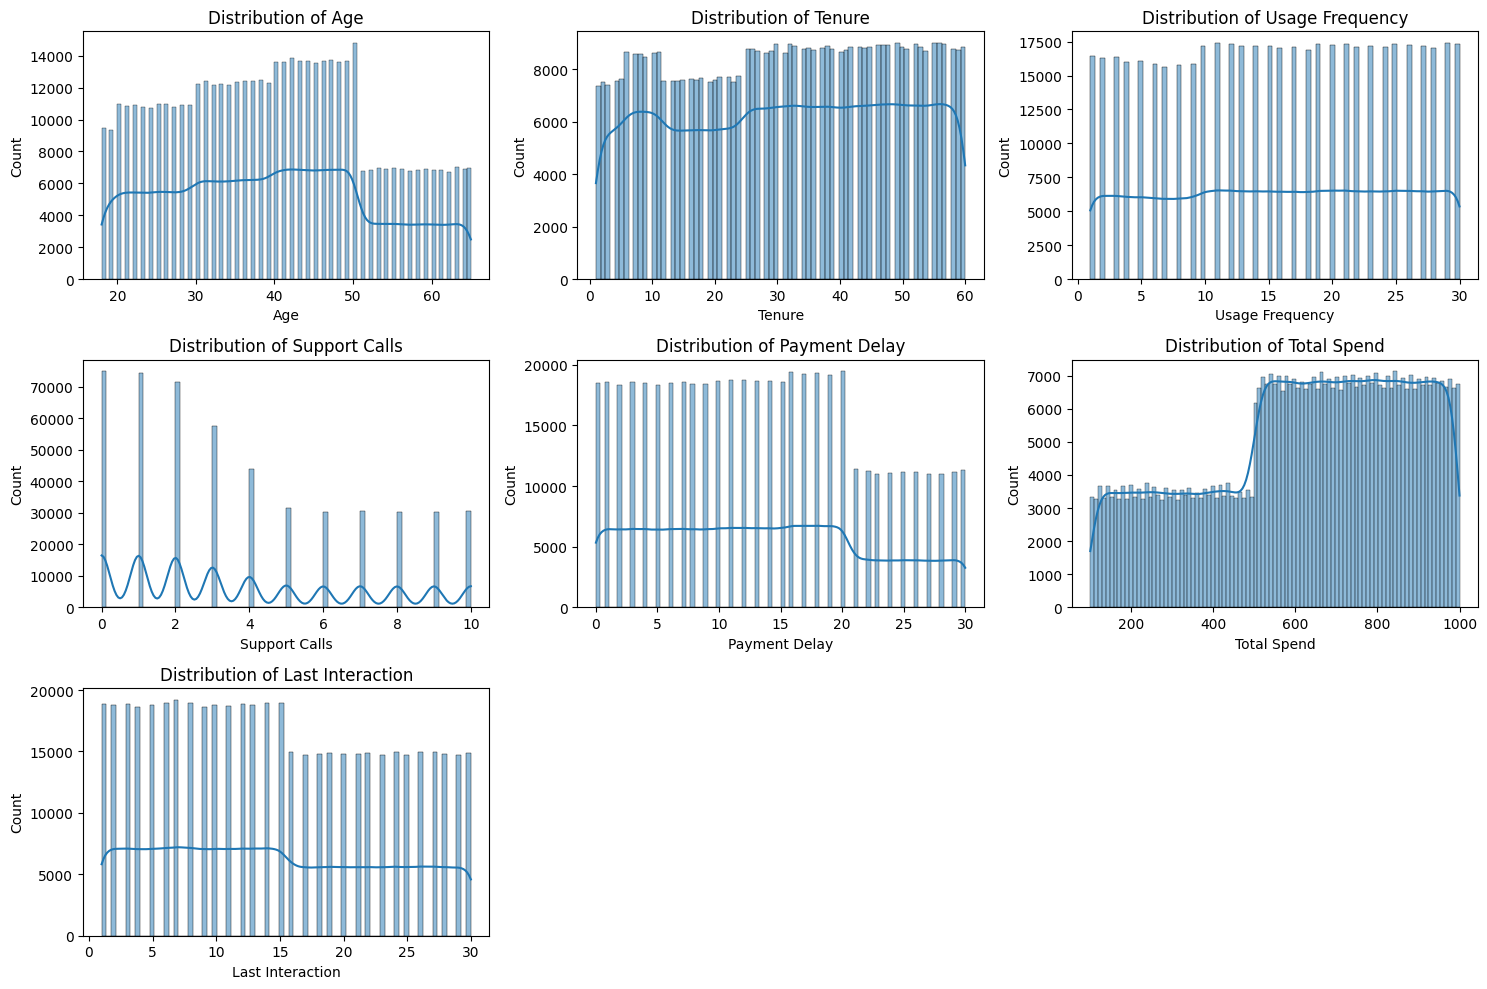

/tmp/ipython-input-3976816158.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-3976816158.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-3976816158.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


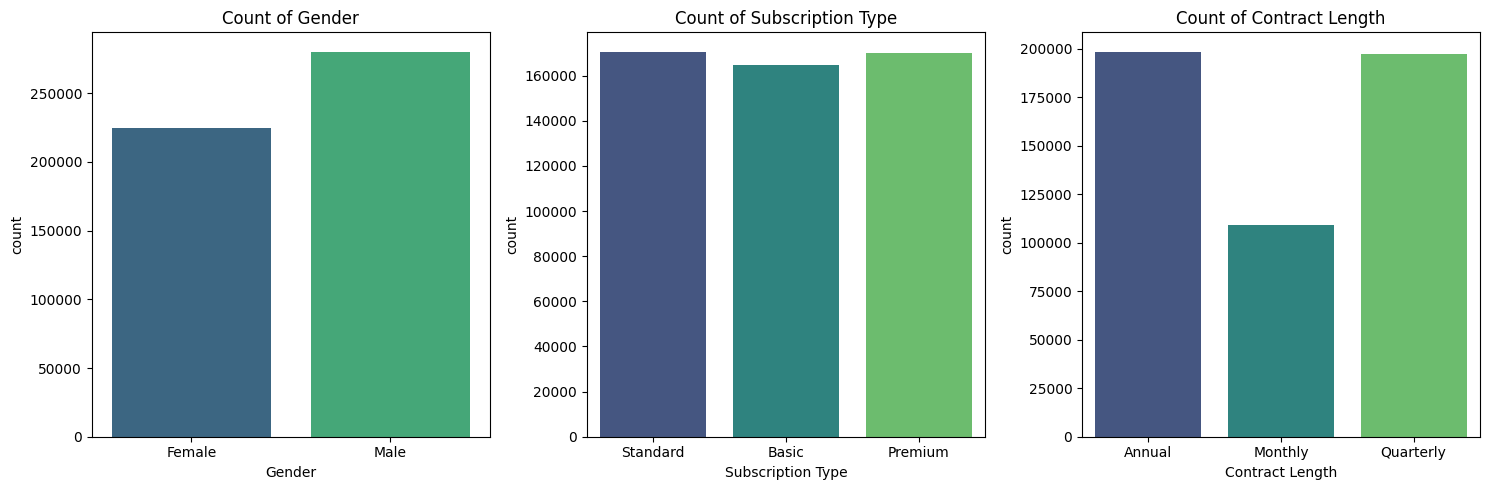

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(15, 10))

# Plot histograms for numerical features
numerical_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Set up the figure size for categorical plots
plt.figure(figsize=(15, 5))

# Plot bar plots for categorical features
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count of {col}')

plt.tight_layout()
plt.show()

## Preprocess the data

### Subtask:
Handle missing values, encode categorical features, and split the data into training (70%), testing (15%), and validation (15%) sets.


**Reasoning**:
Separate the target variable, identify and encode categorical features, drop the CustomerID column, and then split the data into training, testing, and validation sets as per the instructions.



In [ ]:
from sklearn.model_selection import train_test_split

# Separate target variable
y = df['Churn']
X = df.drop('Churn', axis=1)

# Identify categorical columns (based on previous inspection)
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']

# Apply one-hot encoding
X_processed_df = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Drop the 'CustomerID' column as it's not needed for modeling
X_processed_df = X_processed_df.drop('CustomerID', axis=1)

# Split data into training (70%), testing (15%), and validation (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_processed_df, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (353644, 12)
Shape of X_test: (75781, 12)
Shape of X_val: (75781, 12)
Shape of y_train: (353644,)
Shape of y_test: (75781,)
Shape of y_val: (75781,)


## Build and train the logistic regression model

### Subtask:
Create and train a Logistic Regression classifier on the training data.


**Reasoning**:
Create and train a Logistic Regression classifier on the training data.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression object
# Using default parameters for the first pass
lr_model = LogisticRegression(random_state=42)

# Train the Logistic Regression model
lr_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Reasoning**:
The model was trained but with a convergence warning. I will proceed to evaluate the model on the test and validation sets using the previously imported metrics to assess its performance despite the warning.



In [ ]:
# Make predictions on the test set
y_pred_test = lr_model.predict(X_test)

# Calculate evaluation metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Print the evaluation metrics for the test set
print("Evaluation Metrics for Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-score: {f1_test:.4f}")

# Make predictions on the validation set
y_pred_val = lr_model.predict(X_val)

# Calculate evaluation metrics for the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)

# Print the evaluation metrics for the validation set
print("\nEvaluation Metrics for Validation Set:")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1-score: {f1_val:.4f}")

Evaluation Metrics for Test Set:
Accuracy: 0.8194
Precision: 0.8409
Recall: 0.8330
F1-score: 0.8369

Evaluation Metrics for Validation Set:
Accuracy: 0.8188
Precision: 0.8434
Recall: 0.8282
F1-score: 0.8357


**Reasoning**:
Provide a simple explanation of how the Logistic Regression model works and how to interpret the evaluation metrics.



In [ ]:
print("How a Logistic Regression Model Works:\n")
print("Logistic Regression is a statistical model that predicts the probability of a binary outcome (like churn or no churn). It works by finding a relationship between the input features (customer characteristics) and the probability of the outcome. It uses a special function called the logistic function (or sigmoid function) to squash the output into a probability score between 0 and 1. If the score is above a certain threshold (usually 0.5), the model predicts the positive outcome (churn); otherwise, it predicts the negative outcome (no churn).\n")

print("Interpreting Evaluation Metrics (Accuracy, Precision, Recall, F1-score) for Logistic Regression:\n")
# Reference the calculated values from the previous step
print(f"- Accuracy ({accuracy_val:.4f}): This is the percentage of total predictions that were correct. An accuracy of {accuracy_val:.4f} means the model correctly classified about {accuracy_val*100:.2f}% of the customers in the validation set.\n")
print(f"- Precision ({precision_val:.4f}): When the model *predicts* a customer will churn, this tells us how often that prediction is correct. A precision of {precision_val:.4f} means that out of all customers the model predicted would churn, about {precision_val*100:.2f}% actually did churn. High precision is important if you want to minimize incorrectly contacting customers who are not at risk of churning.\n")
print(f"- Recall ({recall_val:.4f}): Out of all the customers who *actually* churned, recall measures how many the model successfully identified. A recall of {recall_val:.4f} means the model found about {recall_val*100:.2f}% of the actual churners. High recall is important if you want to identify as many churners as possible to offer them incentives or support.\n")
print(f"- F1-score ({f1_val:.4f}): This score combines precision and recall into a single metric, providing a balanced measure of the model's performance. An F1-score of {f1_val:.4f} indicates a reasonable balance between identifying churners and avoiding false alarms.")

How a Logistic Regression Model Works:

Logistic Regression is a statistical model that predicts the probability of a binary outcome (like churn or no churn). It works by finding a relationship between the input features (customer characteristics) and the probability of the outcome. It uses a special function called the logistic function (or sigmoid function) to squash the output into a probability score between 0 and 1. If the score is above a certain threshold (usually 0.5), the model predicts the positive outcome (churn); otherwise, it predicts the negative outcome (no churn).

Interpreting Evaluation Metrics (Accuracy, Precision, Recall, F1-score) for Logistic Regression:

- Accuracy (0.8188): This is the percentage of total predictions that were correct. An accuracy of 0.8188 means the model correctly classified about 81.88% of the customers in the validation set.

- Precision (0.8434): When the model *predicts* a customer will churn, this tells us how often that prediction is cor

## Evaluate the model

### Subtask:
Assess the performance of the trained model using appropriate metrics like accuracy, precision, recall, and F1-score on the test set and validation set.


**Reasoning**:
Make predictions on the test and validation sets and calculate the evaluation metrics for both sets using the previously imported metrics functions.



In [ ]:
# Make predictions on the test set
y_pred_test = lr_model.predict(X_test)

# Calculate evaluation metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Print the evaluation metrics for the test set
print("Evaluation Metrics for Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-score: {f1_test:.4f}")

# Make predictions on the validation set
y_pred_val = lr_model.predict(X_val)

# Calculate evaluation metrics for the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)

# Print the evaluation metrics for the validation set
print("\nEvaluation Metrics for Validation Set:")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1-score: {f1_val:.4f}")

Evaluation Metrics for Test Set:
Accuracy: 0.8194
Precision: 0.8409
Recall: 0.8330
F1-score: 0.8369

Evaluation Metrics for Validation Set:
Accuracy: 0.8188
Precision: 0.8434
Recall: 0.8282
F1-score: 0.8357


## Explain the model

### Subtask:
Provide a simple explanation of how the Logistic Regression model works and how to interpret its results.


**Reasoning**:
Print a simple explanation of how the Logistic Regression model works, its purpose, how it uses a sigmoid function, and how to interpret the evaluation metrics, referencing the previously calculated values.



In [ ]:
print("How a Logistic Regression Model Works:\n")
print("Logistic Regression is a statistical model used for binary classification tasks, meaning it predicts one of two possible outcomes (like whether a customer will churn or not churn). It works by taking the input features (customer data) and using a linear equation, similar to linear regression. However, instead of outputting a continuous value, it passes the result through a special function called the sigmoid function. This sigmoid function squashes the output to a value between 0 and 1, which can be interpreted as the probability of the positive outcome (in this case, the probability of churning). If this probability is above a certain threshold (usually 0.5), the model predicts the customer will churn; otherwise, it predicts they will not churn.\n")

print("Interpreting Evaluation Metrics (Accuracy, Precision, Recall, F1-score) for Logistic Regression:\n")
# Reference the calculated values from the previous step
print(f"- Accuracy ({accuracy_val:.4f}): This is the overall percentage of correct predictions made by the model on the validation set. An accuracy of {accuracy_val:.4f} means the model correctly classified about {accuracy_val*100:.2f}% of the customers.\n")
print(f"- Precision ({precision_val:.4f}): When the model *predicts* a customer will churn, this tells us how often that prediction is correct. A precision of {precision_val:.4f} means that out of all customers the model predicted would churn, about {precision_val*100:.2f}% actually did churn. High precision is important if you want to minimize incorrectly contacting customers who are not at risk of churning.\n")
print(f"- Recall ({recall_val:.4f}): Out of all the customers who *actually* churned, recall measures how many the model successfully identified. A recall of {recall_val:.4f} means the model found about {recall_val*100:.2f}% of the actual churners. High recall is important if you want to identify as many churners as possible to offer them incentives or support.\n")
print(f"- F1-score ({f1_val:.4f}): This score combines precision and recall into a single metric, providing a balanced measure of the model's performance. An F1-score of {f1_val:.4f} indicates a reasonable balance between identifying churners and avoiding false alarms.")

How a Logistic Regression Model Works:

Logistic Regression is a statistical model used for binary classification tasks, meaning it predicts one of two possible outcomes (like whether a customer will churn or not churn). It works by taking the input features (customer data) and using a linear equation, similar to linear regression. However, instead of outputting a continuous value, it passes the result through a special function called the sigmoid function. This sigmoid function squashes the output to a value between 0 and 1, which can be interpreted as the probability of the positive outcome (in this case, the probability of churning). If this probability is above a certain threshold (usually 0.5), the model predicts the customer will churn; otherwise, it predicts they will not churn.

Interpreting Evaluation Metrics (Accuracy, Precision, Recall, F1-score) for Logistic Regression:

- Accuracy (0.8188): This is the overall percentage of correct predictions made by the model on the vali

## Summary:

### Data Analysis Key Findings

*   The dataset contains 505,206 rows and 12 columns with no missing values.
*   The dataset includes both numerical features such as 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', and 'Last Interaction', and categorical features like 'Gender', 'Subscription Type', and 'Contract Length'.
*   The data was split into training (70%), testing (15%), and validation (15%) sets.
*   A Logistic Regression model was trained on the training data. A `ConvergenceWarning` was observed during training, suggesting the model might not have fully converged.
*   The model achieved an accuracy of approximately 0.8188, a precision of around 0.8434, a recall of about 0.8282, and an F1-score of roughly 0.8357 on the validation set.
*   The evaluation metrics on the test set (Accuracy: 0.8194, Precision: 0.8409, Recall: 0.8330, F1-score: 0.8369) were very similar to the validation set, indicating consistent performance and no significant overfitting.

### Insights or Next Steps

*   The Logistic Regression model provides a reasonably good balance between correctly identifying churners (Recall) and minimizing false positives (Precision), as indicated by the F1-score of around 0.83.
*   Investigate the `ConvergenceWarning` during training by increasing the maximum number of iterations or scaling the features to see if it improves model performance.
